# Plotting atomic partial charges from Critic2 output-files

## Reading the output files

To plot the partial charges from the Critic2 output the function ``read_stdout`` from the ``io`` sub-package can be used to parse the elements and populations from the output file:

In [1]:
from aim2dat.io.critic2 import read_stdout

Personally, I like to define a dictionary which contains the data:

In [2]:
partial_data = {}
partial_data["ZIF_8_Cl_struc"] = read_stdout("./files/pc_critic2/ZIF-8-Cl-struc-critic2.out")[
    "partial_charges"
]
partial_data["ZIF_8_Cl_comp"] = read_stdout("./files/pc_critic2/ZIF-8-Cl-comp-critic2.out")[
    "partial_charges"
]
partial_data["ZIF_8_Cl_imi"] = read_stdout("./files/pc_critic2/ZIF-8-Cl-imi-critic2.out")[
    "partial_charges"
]

In [3]:
partial_data["ZIF_8_Br_struc"] = read_stdout("./files/pc_critic2/ZIF-8-Br-struc-critic2.out")[
    "partial_charges"
]
partial_data["ZIF_8_Br_comp"] = read_stdout("./files/pc_critic2/ZIF-8-Br-comp-critic2.out")[
    "partial_charges"
]
partial_data["ZIF_8_Br_imi"] = read_stdout("./files/pc_critic2/ZIF-8-Br-imi-critic2.out")[
    "partial_charges"
]

The output of the function is a list containing dictionaries of `elements` and their `population`

In [4]:
partial_data["ZIF_8_Br_imi"]

[{'element': 'C', 'population': 3.04080751},
 {'element': 'N', 'population': 6.20870328},
 {'element': 'C', 'population': 3.6766472},
 {'element': 'C', 'population': 3.60243296},
 {'element': 'N', 'population': 6.04921432},
 {'element': 'Br', 'population': 7.02320405},
 {'element': 'H', 'population': 0.938178293},
 {'element': 'H', 'population': 0.919212183},
 {'element': 'H', 'population': 0.541557784}]

Optional:

The `elements` of the example data contain different symmetries, and thus the calculated `charge` can be arranged in a favorable manner. Therefore, a dictonary of `elements` combined with a list of indicies can be defined:
- `elements` can be split in for example {"H1":[6,7], "H2":[8]}
- `elements` can be combined {"conjugated_network": [[0],[2,3],[6,7],[8]]}. The mean of each element will be calculated and summed

In [5]:
index_struc = {
    "X": [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
    "Zn": [0, 1, 2, 3, 4, 5],
    "N": [
        54,
        55,
        56,
        57,
        58,
        59,
        61,
        62,
        63,
        66,
        67,
        68,
        69,
        70,
        71,
        72,
        76,
        77,
        60,
        64,
        65,
        73,
        74,
        75,
    ],
    "conjugated_network": [
        [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
        [
            18,
            19,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            37,
            38,
            39,
            40,
            41,
        ],
        [
            78,
            79,
            80,
            81,
            82,
            83,
            84,
            85,
            86,
            87,
            88,
            89,
            90,
            91,
            92,
            93,
            94,
            95,
            96,
            97,
            98,
            99,
            100,
            101,
        ],
    ],
}
index_comp = {
    "Zn": [0],
    "X": [9, 25, 10, 27],
    "N": [3, 6, 4, 5, 17, 18, 19, 26],
    "conjugated_network": [
        [1, 2, 13, 14, 22, 23, 24, 29],
        [11, 20, 12, 21],
        [7, 8, 15, 16, 28, 30, 31, 32],
        [33, 34],
    ],
}
index_imi = {"conjugated_network": [[0], [2, 3], [6, 7], [8]], "N": [1, 4], "X": [5]}

Since the `population` depends on the number of valence electrons, we need to supply this information. Each element needs to be defined:

In [6]:
valence_electrons = {"Zn": 12, "H": 1, "C": 4, "N": 5, "Br": 7, "Cl": 7}

## Initialize the plot class

Now the ``PartialChargesPlot`` class in the ``plots`` sub-package is used to visualize the partial charges.  Additional attributes can be set to show and store the plot:

In [7]:
from aim2dat.plots.partial_charges import PartialChargesPlot

pc_plot = PartialChargesPlot()
pc_plot.store_path = "."
pc_plot.store_plot = False
pc_plot.show_plot = True

## Importing data into class
The partial charge is imported with the ``import_partial_charges`` function. All data sets have its own `data_label` to distinguish them. Additionally, these parameters need to be set:
- `plot_label`: groups certain datasets into on class
- `x_label`: distinguishes the datasets into different groups e.g. different functionalization or structures
- `custom_kind_dict`: **optional** if not defined, the mean of each element will be calculated

In [8]:
pc_plot.import_partial_charges(
    data_label="ZIF_8_Cl_struc",
    partial_charges=partial_data["ZIF_8_Cl_struc"],
    valence_electrons=valence_electrons,
    plot_label="Cl",
    x_label="structure",
    custom_kind_dict=index_struc,
)
pc_plot.import_partial_charges(
    data_label="ZIF_8_Cl_comp",
    partial_charges=partial_data["ZIF_8_Cl_comp"],
    valence_electrons=valence_electrons,
    plot_label="Cl",
    x_label="complex",
    custom_kind_dict=index_comp,
)
pc_plot.import_partial_charges(
    data_label="ZIF_8_Cl_imi",
    partial_charges=partial_data["ZIF_8_Cl_imi"],
    valence_electrons=valence_electrons,
    plot_label="Cl",
    x_label="imidazole",
    custom_kind_dict=index_imi,
)

In [9]:
pc_plot.import_partial_charges(
    data_label="ZIF_8_Br_struc",
    partial_charges=partial_data["ZIF_8_Br_struc"],
    valence_electrons=valence_electrons,
    plot_label="Br",
    x_label="structure",
    custom_kind_dict=index_struc,
)
pc_plot.import_partial_charges(
    data_label="ZIF_8_Br_comp",
    partial_charges=partial_data["ZIF_8_Br_comp"],
    valence_electrons=valence_electrons,
    plot_label="Br",
    x_label="complex",
    custom_kind_dict=index_comp,
)
pc_plot.import_partial_charges(
    data_label="ZIF_8_Br_imi",
    partial_charges=partial_data["ZIF_8_Br_imi"],
    valence_electrons=valence_electrons,
    plot_label="Br",
    x_label="imidazole",
    custom_kind_dict=index_imi,
)

## Plotting data

Data sets chosen by their `data_label` are plotted with the function ``plot``.

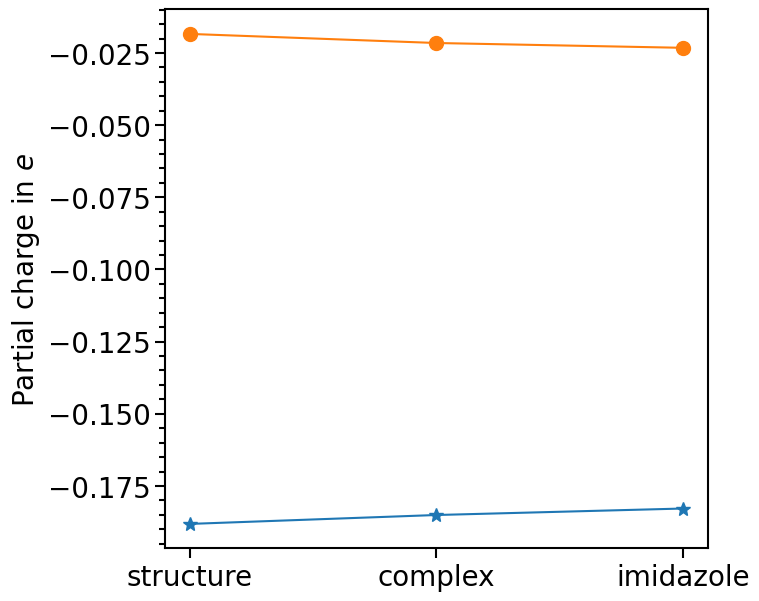

In [10]:
plot = pc_plot.plot(
    data_labels=[
        "ZIF_8_Cl_struc",
        "ZIF_8_Cl_comp",
        "ZIF_8_Cl_imi",
        "ZIF_8_Br_struc",
        "ZIF_8_Br_comp",
        "ZIF_8_Br_imi",
    ]
)

The plot typ can be set via the attribute ``pc_plot_type``. The options are `"scatter"` or `"bar"`:

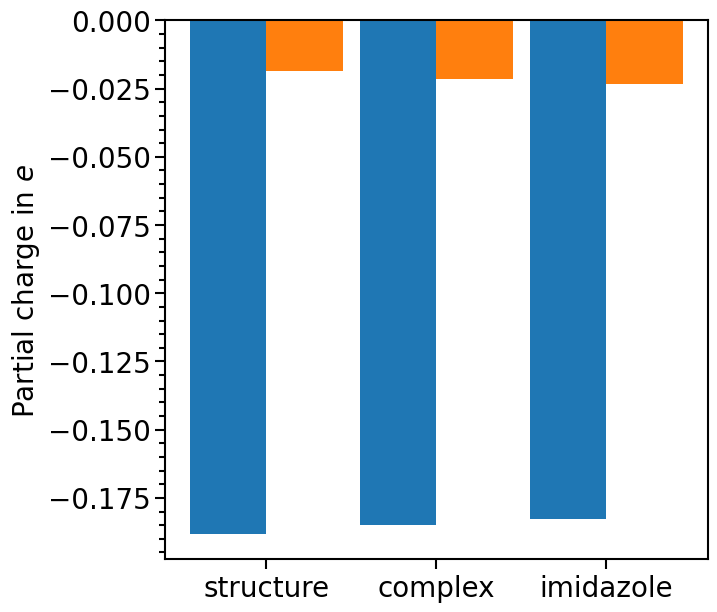

In [11]:
pc_plot.pc_plot_type = "bar"
plot = pc_plot.plot(
    data_labels=[
        "ZIF_8_Cl_struc",
        "ZIF_8_Cl_comp",
        "ZIF_8_Cl_imi",
        "ZIF_8_Br_struc",
        "ZIF_8_Br_comp",
        "ZIF_8_Br_imi",
    ]
)

- ``ratio``: modifies the size of the figure in inch
- ``subplot_tight_layout``: adjusts the `hspace` and `wspace` automatically
- ``subplot_ncols`` and ``subplot_nrows``: shows multiple plots with the different `elements`

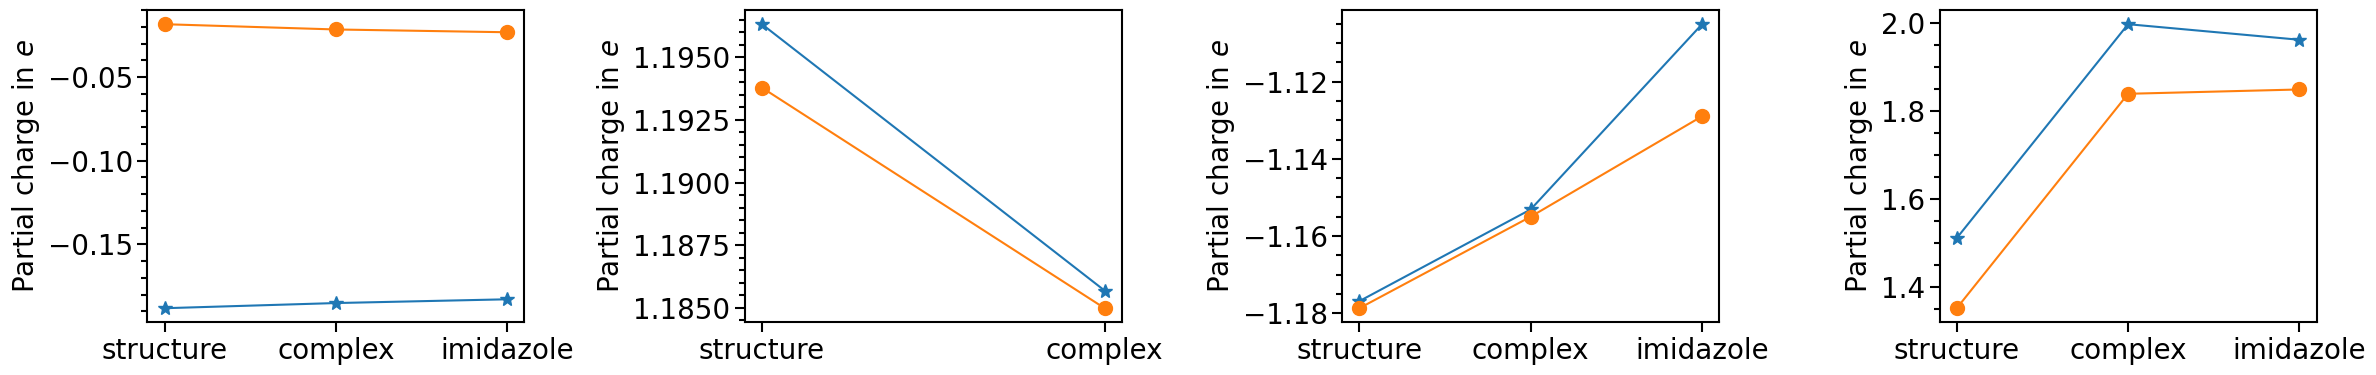

In [12]:
pc_plot.pc_plot_type = "scatter"
pc_plot.ratio = 24, 4
pc_plot.subplot_tight_layout = True
pc_plot.subplot_ncols, pc_plot.subplot_nrows = 4, 1
plot = pc_plot.plot(
    data_labels=[
        "ZIF_8_Cl_struc",
        "ZIF_8_Cl_comp",
        "ZIF_8_Cl_imi",
        "ZIF_8_Br_struc",
        "ZIF_8_Br_comp",
        "ZIF_8_Br_imi",
    ]
)

- ``pc_plot_order``: arranges the `elements` in given order for subplots
- ``show_legend``: adds a legend. Each subplot can be set individually but if `(True, False)` is set, first plot is set to `True`, rest is set to `False`
- `plot_title`: adds a title to each subplot

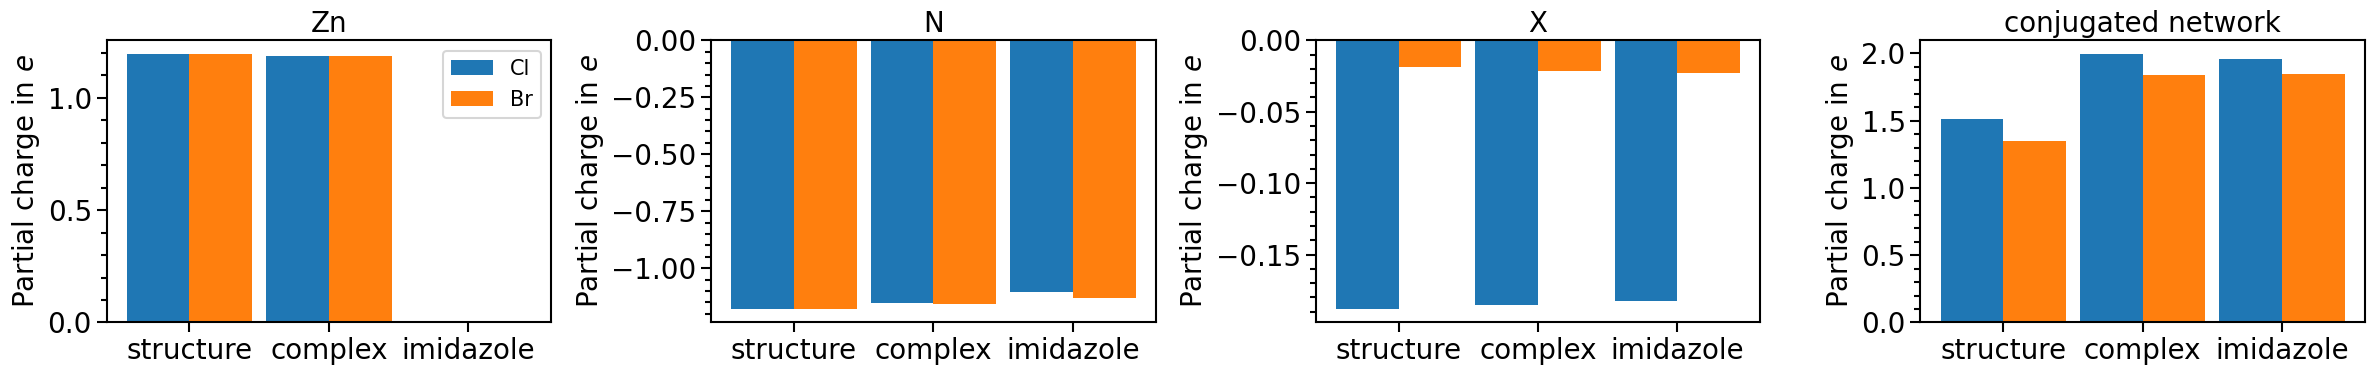

In [13]:
pc_plot.pc_plot_type = "bar"
pc_plot.show_legend = (True, False)
pc_plot.ratio = 24, 4
pc_plot.subplot_tight_layout = True
pc_plot.subplot_ncols, pc_plot.subplot_nrows = 4, 1
pc_plot.pc_plot_order = ["Zn", "N", "X", "conjugated_network"]
plot = pc_plot.plot(
    data_labels=[
        "ZIF_8_Cl_struc",
        "ZIF_8_Cl_comp",
        "ZIF_8_Cl_imi",
        "ZIF_8_Br_struc",
        "ZIF_8_Br_comp",
        "ZIF_8_Br_imi",
    ],
    plot_title=["Zn", "N", "X", "conjugated network"],
)